<a href="https://www.kaggle.com/barzcan/mushroom-classification-with-ann-100-accuracy?scriptVersionId=88412699" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
dataset=pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X=dataset.drop('class',axis=1)
y=dataset['class']

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
X.describe(include='all').T

,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


In [6]:
column_names=list()
for names in X.columns:
    column_names.append(names)
    
column_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [7]:
X=pd.get_dummies(data=X, columns=column_names,drop_first=True)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 8124 non-null   uint8
 1   cap-shape_f                 8124 non-null   uint8
 2   cap-shape_k                 8124 non-null   uint8
 3   cap-shape_s                 8124 non-null   uint8
 4   cap-shape_x                 8124 non-null   uint8
 5   cap-surface_g               8124 non-null   uint8
 6   cap-surface_s               8124 non-null   uint8
 7   cap-surface_y               8124 non-null   uint8
 8   cap-color_c                 8124 non-null   uint8
 9   cap-color_e                 8124 non-null   uint8
 10  cap-color_g                 8124 non-null   uint8
 11  cap-color_n                 8124 non-null   uint8
 12  cap-color_p                 8124 non-null   uint8
 13  cap-color_r                 8124 non-null   uint8
 14  cap-colo

In [9]:
X.head(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
y=pd.get_dummies(y,drop_first=True)
y.head(5)

,p
0,1
1,0
2,0
3,1
4,0


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Initialising the ANN
classifier = Sequential()


classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 95))

classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))


classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stopping=tensorflow.keras.callbacks.EarlyStopping(patience=2)

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 80, epochs = 100,validation_data=(X_test,y_test),verbose=2,callbacks=[early_stopping])

Train on 6499 samples, validate on 1625 samples
Epoch 1/100
6499/6499 - 1s - loss: 0.2414 - accuracy: 0.9432 - val_loss: 0.0145 - val_accuracy: 0.9982
Epoch 2/100
6499/6499 - 0s - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/100
6499/6499 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 9.8723e-04 - val_accuracy: 1.0000
Epoch 4/100
6499/6499 - 0s - loss: 7.9061e-04 - accuracy: 1.0000 - val_loss: 4.2174e-04 - val_accuracy: 1.0000
Epoch 5/100
6499/6499 - 0s - loss: 4.3457e-04 - accuracy: 1.0000 - val_loss: 2.8904e-04 - val_accuracy: 1.0000
Epoch 6/100
6499/6499 - 0s - loss: 2.7770e-04 - accuracy: 1.0000 - val_loss: 1.8597e-04 - val_accuracy: 1.0000
Epoch 7/100
6499/6499 - 0s - loss: 1.8690e-04 - accuracy: 1.0000 - val_loss: 1.2928e-04 - val_accuracy: 1.0000
Epoch 8/100
6499/6499 - 0s - loss: 1.3474e-04 - accuracy: 1.0000 - val_loss: 8.7174e-05 - val_accuracy: 1.0000
Epoch 9/100
6499/6499 - 0s - loss: 9.9863e-05 - accuracy: 1.0000 - val_loss: 6.7067e

In [13]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



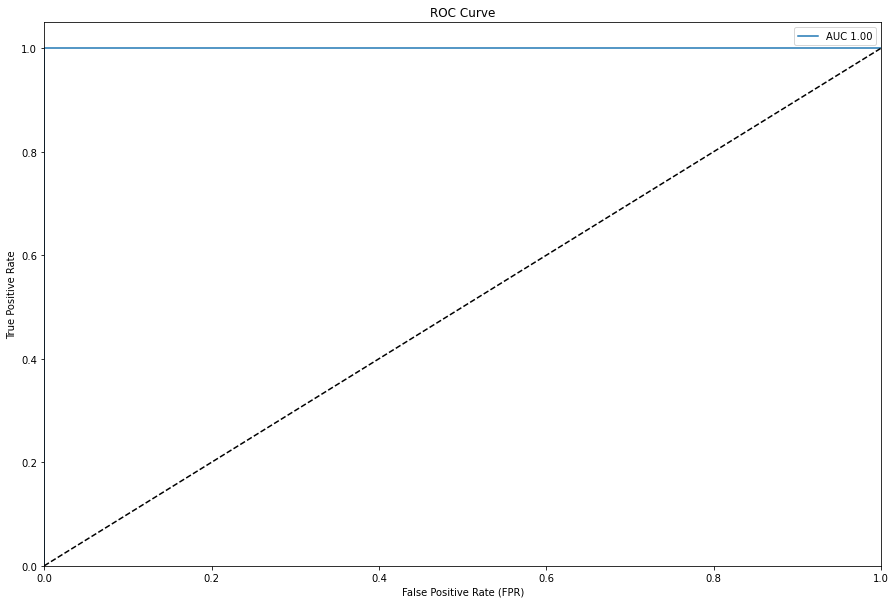

In [14]:
#Roc curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,ThreshHold=roc_curve(y_test,y_pred)
aucValue=auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,label='AUC %0.2f'% aucValue)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()